In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import matplotlib.gridspec as gs
duration = 2.3 # [T] = ms -> [rate] = kHz

%matplotlib notebook

<ipython-input-1-b5edd5b62012>:2: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  import matplotlib.pyplot as plt


In [2]:
points_storage = np.load("points_validation.npy")
rates_storage = np.load("rates_validation.npy")
weights_hidden_storage = np.load("weights_hidden.npy")
weights_out_storage = np.load("weights_out.npy")
bias_storage = np.load("bias.npy")
# convert rates to Hz
rates_storage /= duration

learning_steps = rates_storage.shape[0]
n_steps = rates_storage.shape[1]
n_nrns = rates_storage.shape[2]
accuracy = np.zeros(learning_steps)
target = {1: 75/duration,
          2: 215/duration}
VMAX = 255/duration
VMIN = 0/duration
    
error = np.zeros((learning_steps, n_steps))
targets = np.zeros((learning_steps, n_steps))

<IPython.core.display.Javascript object>


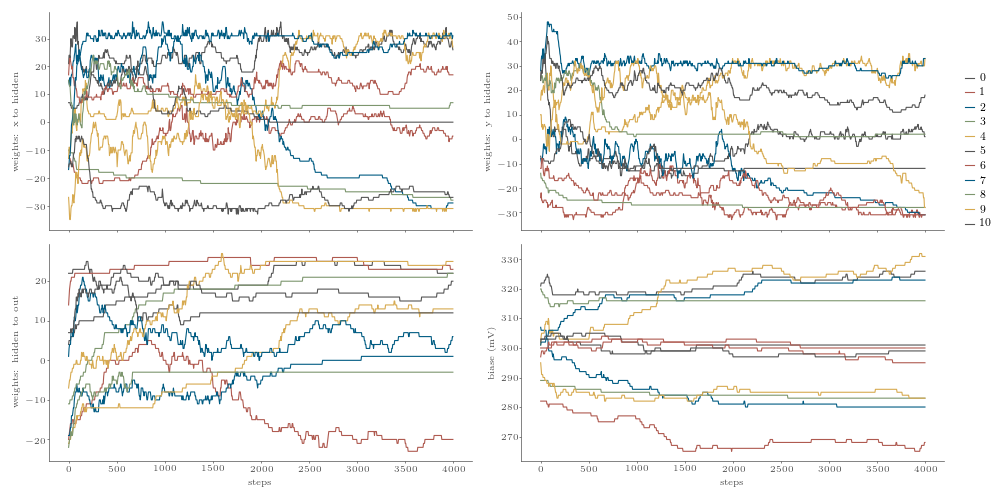

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


In [3]:
n_h_nrns = 11
n_nrns = 12
real_epochs = np.array(range(learning_steps))*5
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,5), sharex=True)
axes = axes.flatten()
axes[0].plot(real_epochs, weights_hidden_storage[:,0,:])
axes[1].plot(real_epochs, weights_hidden_storage[:,1,:])
axes[2].plot(real_epochs, weights_out_storage)
axes[3].plot(real_epochs, bias_storage)
axes[0].set_ylabel("weights: x to hidden")
#axes[0].legend(list(range(n_h_nrns)), fontsize=5)
axes[1].set_ylabel("weights: y to hidden")
axes[2].set_xlabel("steps")
#axes[1].legend(list(range(n_h_nrns)), fontsize=5)
axes[2].set_ylabel("weights: hidden to out")
axes[1].legend(list(range(n_h_nrns)), fontsize=8, loc=(1.05,0))
axes[3].set_ylabel("biase (mV)")
axes[3].set_xlabel("steps")
plt.subplots_adjust(hspace=0.15)
plt.tight_layout()
#axes[3].legend(list(range(n_nrns)), fontsize=5)
plt.savefig("model_parameters.png", transparent=True)